In [1]:
import numpy as np
from numpy import (savez,load,save)
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv", "yellow_2021_01.csv")
df = pd.read_csv("yellow_2021_01.csv", cache_dates=True)

c:\users\ym15c.fsu\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df = df.dropna(how='any')
df['day'] = pd.Categorical(df['day'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

The two plots below show that for rides made with all payment types (excluding disputes), 
trips on Wendnesdays generate the least amount of mean total fare. 
Among seven days of a week, Sunday has the least demand for taxi rides.

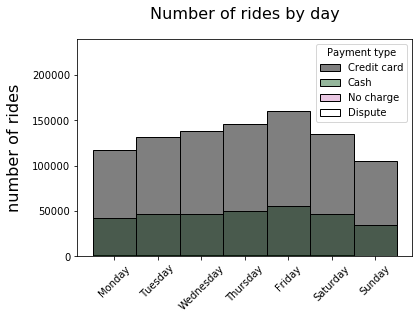

In [20]:
fig, ax1 = plt.subplots()
sp1 = sns.histplot(df, x="day", hue="payment_type", hue_order=[1, 2, 3, 4], 
                   stat="count", common_norm=True, fill=True, ax=ax1, palette='cubehelix')

ax1.set_title('Number of rides by day', fontsize=16, pad=20)
ax1.set_xlabel('')
ax1.set_ylim(0,240000)
ax1.set_ylabel('number of rides', fontsize=16, labelpad=10)
ax1.set_xticklabels(labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], rotation = 45)
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Credit card', 'Cash', 'No charge', 'Dispute'], title='Payment type')
plt.show()

Text(0.5, 0.98, 'Total fare by days of a week')

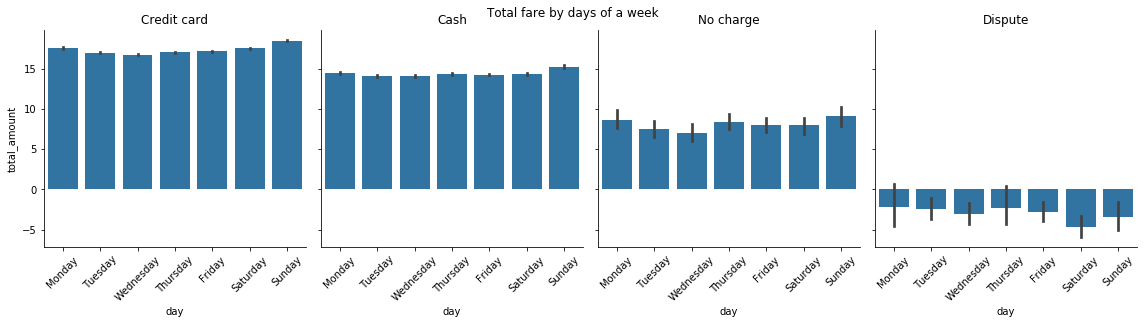

In [21]:
g = sns.FacetGrid(df, col="payment_type", height=4, aspect=1)
g.map(sns.barplot, "day", "total_amount", order=['Monday',  'Tuesday',
       'Wednesday','Thursday', 'Friday','Saturday', 'Sunday'])
g.set_xticklabels(rotation = 45)
axes = g.axes.flatten()
axes[0].set_title("Credit card")
axes[1].set_title("Cash")
axes[2].set_title("No charge")
axes[3].set_title("Dispute")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total fare by days of a week')

Text(0.5, 0.98, 'Total fare by hours of a day')

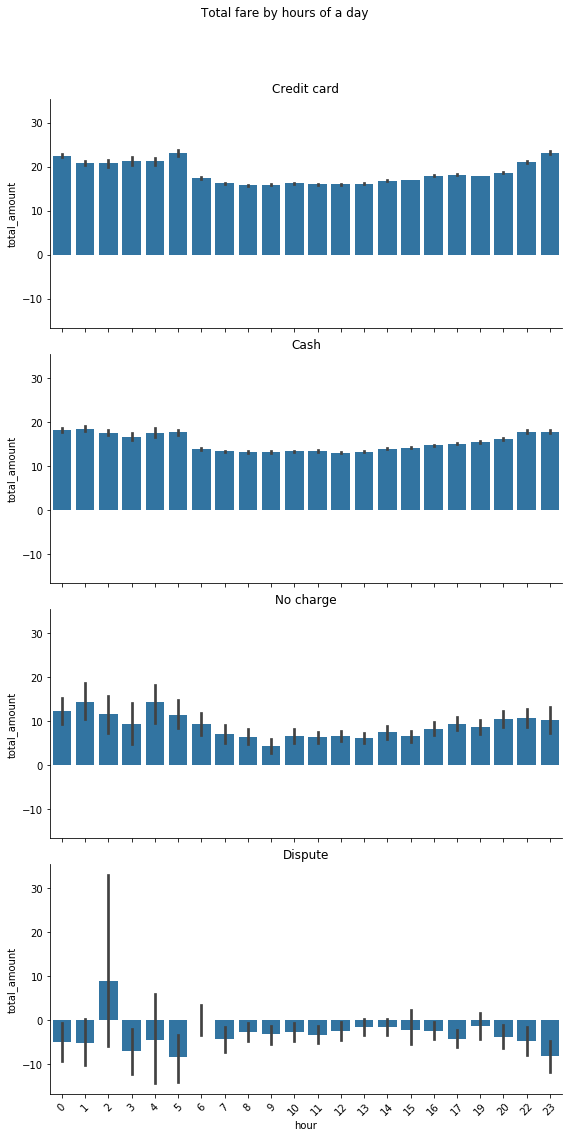

In [7]:
g = sns.FacetGrid(df, col="payment_type", height=4, aspect=2, col_wrap = 1)
g.map(sns.barplot, "hour", "total_amount", order=[0, 1, 2, 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 19, 20, 22, 23])
g.set_xticklabels(rotation = 45)
axes = g.axes.flatten()
axes[0].set_title("Credit card")
axes[1].set_title("Cash")
axes[2].set_title("No charge")
axes[3].set_title("Dispute")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total fare by hours of a day')